<a href="https://colab.research.google.com/github/NabinMahanty/project/blob/main/Intern_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score

In [2]:
from google.colab import files
uploaded = files.upload()

Saving mcdonalds.csv to mcdonalds.csv


In [46]:
data  = pd.read_csv("mcdonalds.csv");
data1 = pd.read_csv("mcdonalds.csv");
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [5]:
data.shape

(1453, 15)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [8]:
data.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


from matplotlib import pyplot as plt
_df_0['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_15.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='Age', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [9]:
data.head(3)


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [10]:
MD=data.iloc[:,0:11].replace("Yes",1).replace("No",0)
mean=round(MD.mean(),2)
mean

,0
yummy,0.55
convenient,0.91
spicy,0.09
fattening,0.87
greasy,0.53
fast,0.90
cheap,0.60
tasty,0.64
expensive,0.36
healthy,0.20


In [11]:
pca = PCA()
MD_pca=pca.fit_transform(MD)
MD_p=pca.fit(MD)

SD=np.sqrt(pca.explained_variance_)
PV=pca.explained_variance_ratio_
index=[]
for i in range(len(SD)):
    i=i+1
    index.append("PC{}".format(i))

sum=pd.DataFrame({
    "Standard deviation":SD,"Proportion of Variance":PV,"Cumulative Proportion":PV.cumsum()
},index=index)
sum

,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,0.757050,0.299447,0.299447
PC2,0.607456,0.192797,0.492244
PC3,0.504619,0.133045,0.625290
PC4,0.398799,0.083096,0.708386
PC5,0.337405,0.059481,0.767866
PC6,0.310275,0.050300,0.818166
PC7,0.289697,0.043849,0.862015
PC8,0.275122,0.039548,0.901563
PC9,0.265251,0.036761,0.938323
PC10,0.248842,0.032353,0.970677


from matplotlib import pyplot as plt
sum['Standard deviation'].plot(kind='hist', bins=20, title='Standard deviation')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sum['Proportion of Variance'].plot(kind='hist', bins=20, title='Proportion of Variance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sum['Cumulative Proportion'].plot(kind='hist', bins=20, title='Cumulative Proportion')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sum.plot(kind='scatter', x='Standard deviation', y='Proportion of Variance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sum.plot(kind='scatter', x='Proportion of Variance', y='Cumulative Proportion', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Cumulative Proportion']
  ys = series['Standard deviation']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = sum.sort_values('Cumulative Proportion', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Cumulative Proportion')
_ = plt.ylabel('Standard deviation')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Cumulative Proportion']
  ys = series['Proportion of Variance']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = sum.sort_values('Cumulative Proportion', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Cumulative Proportion')
_ = plt.ylabel('Proportion of Variance')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Cumulative Proportion']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Cumulative Proportion'}, axis=1)
              .sort_values('Cumulative Proportion', ascending=True))
  xs = counted['Cumulative Proportion']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = sum.sort_values('Cumulative Proportion', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Cumulative Proportion')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
sum['Standard deviation'].plot(kind='line', figsize=(8, 4), title='Standard deviation')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
sum['Proportion of Variance'].plot(kind='line', figsize=(8, 4), title='Proportion of Variance')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
sum['Cumulative Proportion'].plot(kind='line', figsize=(8, 4), title='Cumulative Proportion')
plt.gca().spines[['top', 'right']].set_visible(False)

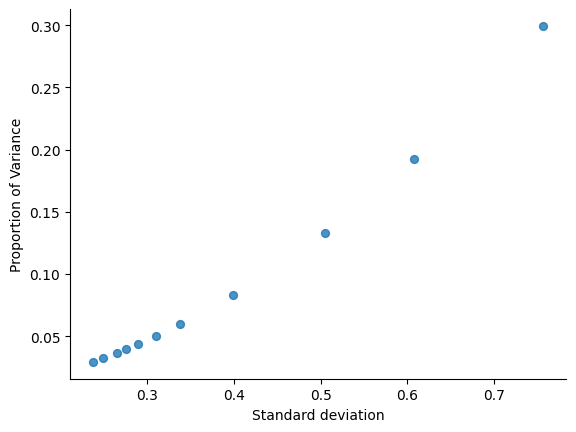

In [13]:
from matplotlib import pyplot as plt
sum.plot(kind='scatter', x='Standard deviation', y='Proportion of Variance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

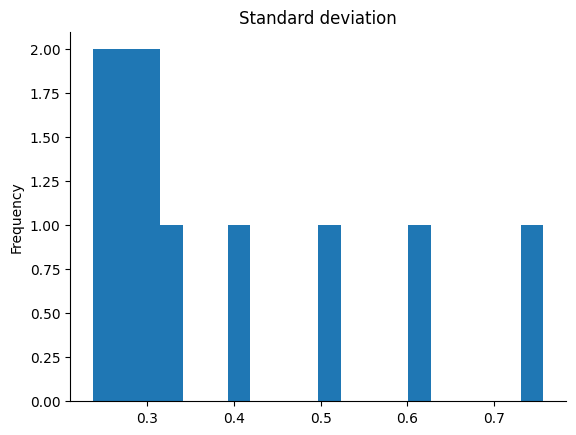

In [12]:
from matplotlib import pyplot as plt
sum['Standard deviation'].plot(kind='hist', bins=20, title='Standard deviation')
plt.gca().spines[['top', 'right',]].set_visible(False)

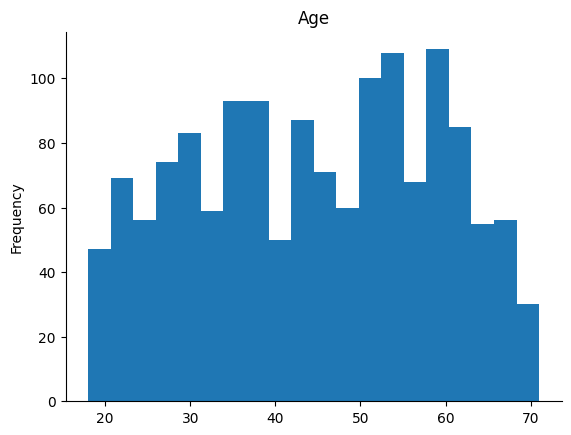

In [4]:
from matplotlib import pyplot as plt
data['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

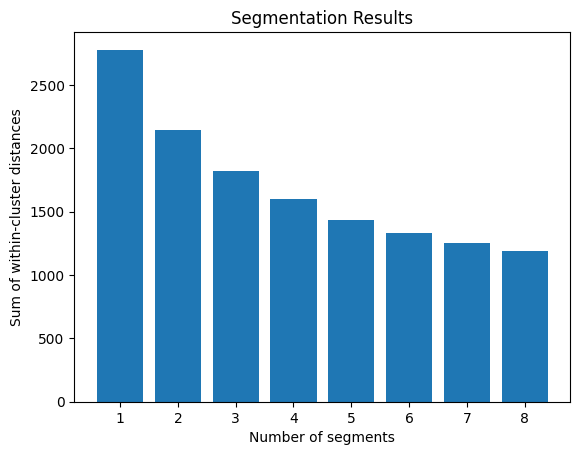

In [21]:
np.random.seed(1234)

nrep = 10

num_segments = range(1, 9)
within_cluster_distances = []
MD_km28 = {}

for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(MD)
    within_cluster_distances.append((kmeans.inertia_))
    MD_km28[str(k)] = kmeans

plt.bar(num_segments, within_cluster_distances)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
plt.show()

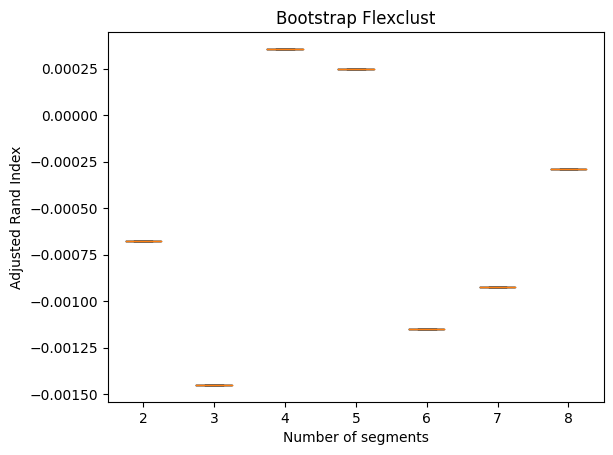

In [22]:
np.random.seed(1234)
nboot = 100
nrep = 10

bootstrap_samples = []
for _ in range(nboot):
    bootstrap_sample = resample(MD.values, random_state=1234)
    bootstrap_samples.append(bootstrap_sample)

adjusted_rand_index = []
num_segments = range(2, 9)
for k in num_segments:
    stability_scores = []
    for bootstrap_sample in bootstrap_samples:
        kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
        kmeans.fit(bootstrap_sample)
        cluster_labels = kmeans.predict(bootstrap_sample)
        true_labels = kmeans.predict(MD.values)
        stability_score = adjusted_rand_score(true_labels, cluster_labels)
        stability_scores.append(stability_score)
    adjusted_rand_index.append(stability_scores)

# Transpose the adjusted_rand_index list
adjusted_rand_index = np.array(adjusted_rand_index).T

# Create boxplot of adjusted Rand index
plt.boxplot(adjusted_rand_index, labels=num_segments, whis=10)
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Bootstrap Flexclust")
plt.show()

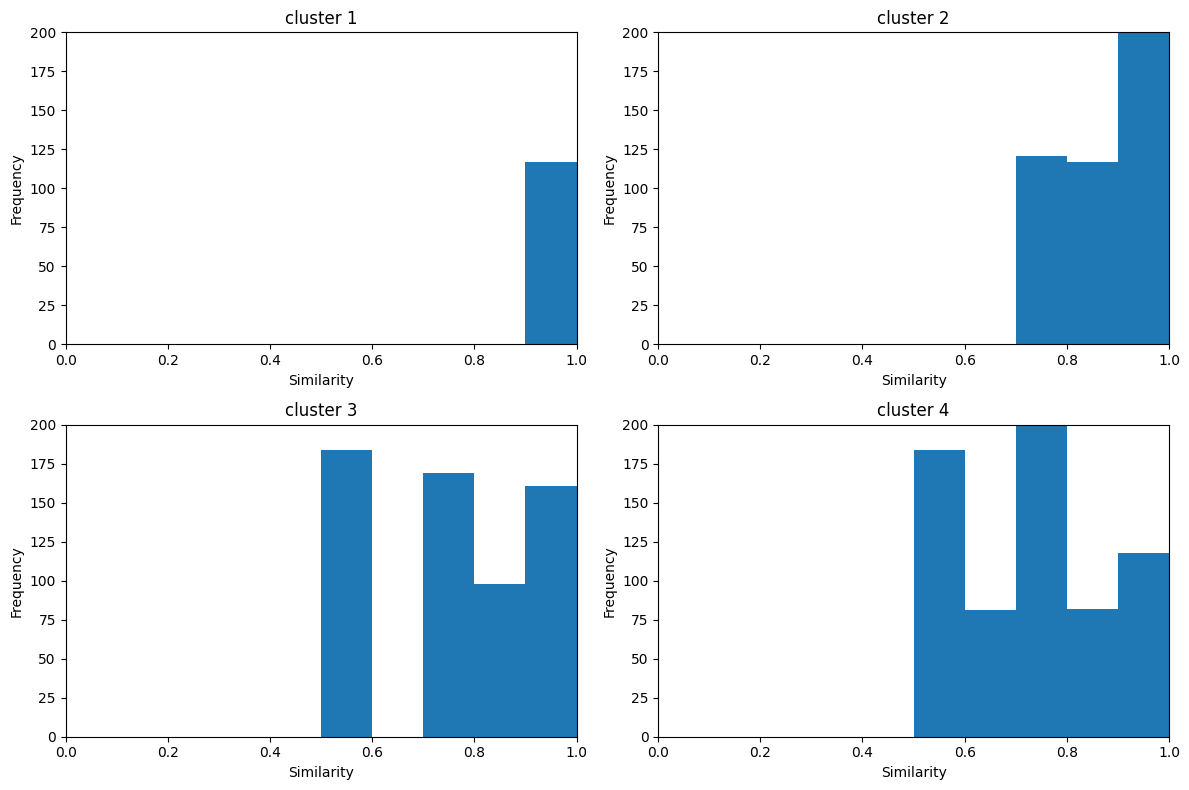

In [23]:
range_values = (0, 1)
num_bins = 10
max_frequency = 200


fig, axs = plt.subplots(2, 2, figsize=(12, 8))


for i in range(1, 5):
    labels = MD_km28[str(i)].predict(MD)
    similarities = MD_km28[str(i)].transform(MD).min(axis=1)
    row = (i - 1) // 2
    col = (i - 1) % 2

    axs[row, col].hist(similarities, bins=num_bins, range=range_values)
    axs[row, col].set_xlabel('Similarity')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title('cluster {}'.format(i))

    axs[row, col].set_xlim(range_values)
    axs[row, col].set_ylim(0, max_frequency)


    axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.tight_layout()
plt.show()

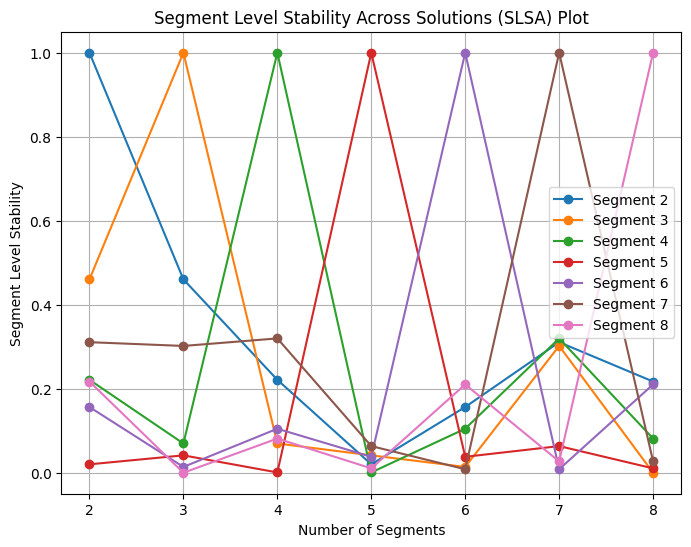

In [24]:
num_segments = range(2, 9)

segment_stability = []
for segment in range(2, 9):
    labels_segment = MD_km28[str(segment)].predict(MD)
    segment_stability.append(labels_segment)

plt.figure(figsize=(8, 6))
for i, segment in enumerate(range(2, 9)):
    plt.plot(num_segments, [np.mean(segment_stability[i] == labels) for labels in segment_stability], marker='o', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)

plt.show()

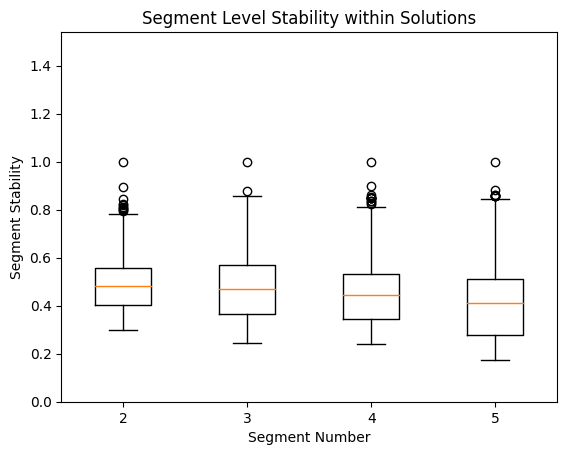

In [31]:

segment_solutions = ["2", "3", "4", "5"]
segment_labels = {}
segment_similarities = {}

for segment in segment_solutions:
    segment_labels[segment] = MD_km28[segment].predict(MD)
    segment_similarities[segment] = MD_km28[segment].transform(MD).min(axis=1)

segment_stability_values = []
for segment in segment_solutions:
    similarities = segment_similarities[segment]
    normalized_similarities = similarities / np.max(similarities)
    segment_stability_values.append(normalized_similarities)

plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1.54)
plt.title("Segment Level Stability within Solutions")

plt.show()

In [32]:
from scipy.stats import entropy

np.random.seed(1234)
k_values = range(2, 9)
MD_m28 = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=1234)
    model.fit(MD.values)
    iter_val = model.n_iter_
    converged = True
    k_val = k
    k0_val = k
    log_likelihood = -model.inertia_
    n_samples, _ = MD.shape
    aic = -2 * log_likelihood + 2 * k
    bic = -2 * log_likelihood + np.log(n_samples) * k
    labels = model.labels_
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())
    class_entropy = entropy(probs)
    icl = bic - class_entropy

    MD_m28.append((iter_val, converged, k_val, k0_val, log_likelihood, aic, bic, icl))
MD_m28 = pd.DataFrame(MD_m28, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])

print(MD_m28)

   iter  converged  k  k0       logLik          AIC          BIC          ICL
0    10       True  2   2 -2146.062044  4296.124088  4306.686859  4306.015908
1     5       True  3   3 -1896.330266  3798.660532  3814.504689  3813.529671
2     9       True  4   4 -1603.913802  3215.827604  3236.953147  3235.627738
3     9       True  5   5 -1502.697153  3015.394306  3041.801234  3040.267284
4     7       True  6   6 -1348.665399  2709.330799  2741.019113  2739.277954
5    10       True  7   7 -1249.233890  2512.467780  2549.437480  2547.530062
6     9       True  8   8 -1203.646165  2423.292330  2465.543415  2463.533662


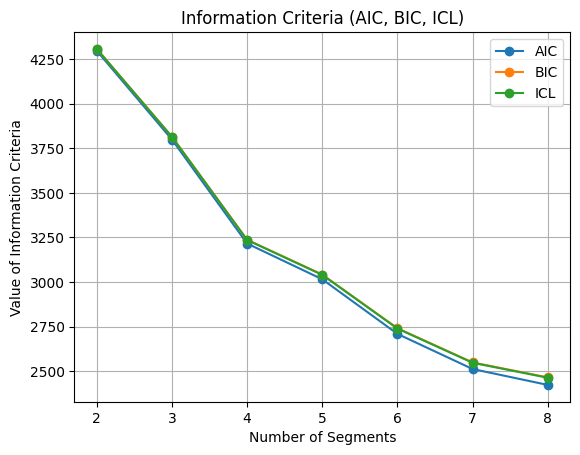

In [33]:
num_segments = MD_m28["k"]
AIC_values = MD_m28["AIC"]
BIC_values = MD_m28["BIC"]
ICL_values = MD_m28["ICL"]

plt.plot(num_segments, AIC_values, marker='o', label='AIC')
plt.plot(num_segments, BIC_values, marker='o', label='BIC')
plt.plot(num_segments, ICL_values, marker='o', label='ICL')

plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC, ICL)')
plt.legend()
plt.grid(True)

plt.show()

In [34]:
from sklearn.mixture import GaussianMixture
k = 4
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(MD)
kmeans_clusters = kmeans.predict(MD)

gmm = GaussianMixture(n_components=k, random_state=1234)
gmm.fit(MD)
gmm_clusters = gmm.predict(MD)

results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

MD_m4 = MD[results['mixture'] == 3]

k4_m4 = KMeans(n_clusters=k, random_state=1234)
k4_m4.fit(MD_m4)
k4_m4_clusters = k4_m4.predict(MD_m4)

results_m4 = pd.DataFrame({'kmeans': k4_m4_clusters, 'mixture': 3})

print(pd.crosstab(results['kmeans'], results['mixture']))
print(pd.crosstab(results['kmeans'], results_m4['kmeans']))

mixture    0    1    2    3
kmeans                     
0        546    0    1   33
1          0  213   11    4
2         46    3  265    8
3         29   38    0  256
kmeans   0   1   2   3
kmeans                
0       51  15  35  20
1       18   8  11  11
2       23   9  14  22
3       29   5  15  15


In [35]:

from sklearn.mixture import GaussianMixture
import numpy as np

gmm_m4a = GaussianMixture(n_components=4)
gmm_m4a.fit(MD)

log_likelihood_m4a = gmm_m4a.score(MD)

gmm_m4 = GaussianMixture(n_components=4)
gmm_m4.fit(MD)

log_likelihood_m4 = gmm_m4.score(MD)

print("Log-likelihood for MD.m4a:", log_likelihood_m4a)
print("Log-likelihood for MD.m4:", log_likelihood_m4)

Log-likelihood for MD.m4a: 9.456781748071887
Log-likelihood for MD.m4: 3.6427464011765807


In [36]:
like_counts = pd.value_counts(data['Like'])
reversed_counts = like_counts.iloc[::-1]

print(reversed_counts)

Like
-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: count, dtype: int64


<ipython-input-36-d525372f2881>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  like_counts = pd.value_counts(data['Like'])


In [37]:
# Define a mapping of string values to numeric codes
like_mapping = {
    'I HATE IT!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    'I LOVE IT!+5': 5
}

data['Like.n'] = data['Like'].map(like_mapping)


like_n_counts = data['Like.n'].value_counts()


print(like_n_counts)

Like.n
 0.0    169
-3.0     73
-4.0     71
-2.0     59
-1.0     58
Name: count, dtype: int64


In [38]:
from patsy import dmatrices

independent_vars = data.columns[0:11]

formula_str = ' + '.join(independent_vars)

formula_str = 'Like ~ ' + formula_str


f = dmatrices(formula_str, data=data)[1]

print(f)

[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


In [39]:
from sklearn.mixture import GaussianMixture
from patsy import dmatrix
np.random.seed(1234)

X = dmatrix(f.design_info, data=data)
y = dmatrix('Like', data=data)

n_components = 2
n_init = 10
verbose = False
n_rep=10

model = GaussianMixture(n_components=n_components, n_init=n_init, verbose=verbose)
MD_reg2 = model.fit(X, y)

print(MD_reg2)
cluster_sizes = np.bincount(model.predict(X))

print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"{i+1}: {size}")

GaussianMixture(n_components=2, n_init=10, verbose=False)
Cluster sizes:
1: 985
2: 468


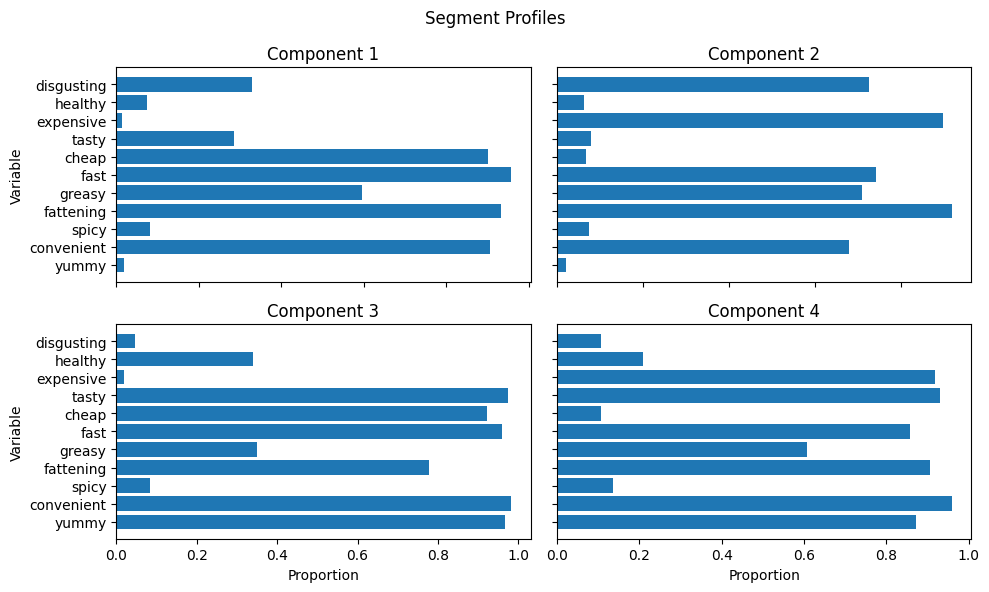

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

kmeans = MD_km28['4']

labels = kmeans.labels_

MD_mean = MD.groupby(labels).mean()

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[0])
axs[0, 0].set_title('Component 1')
axs[0, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[1])
axs[0, 1].set_title('Component 2')
axs[1, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[2])
axs[1, 0].set_title('Component 3')
axs[1, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[3])
axs[1, 1].set_title('Component 4')

for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(MD_mean.shape[1]))
    ax.set_yticklabels(MD.columns)

for ax in axs.flat:
    ax.label_outer()

fig.suptitle('Segment Profiles')

fig.tight_layout()

plt.show()

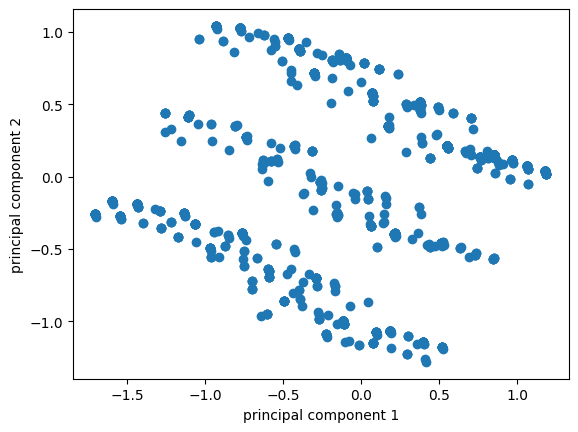

In [41]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=4)
kmeans.fit(MD)

pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD)

fig, ax = plt.subplots()

ax.scatter(MD_pca[:, 0], MD_pca[:, 1])
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
plt.show()

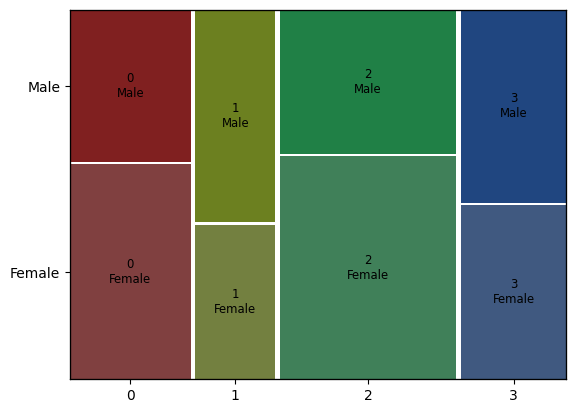

In [43]:
from statsmodels.graphics.mosaicplot import mosaic

MD_k4=MD_km28['4']
k4 = MD_k4.labels_

ct = pd.crosstab(k4, data['Gender'])
ct
mosaic(ct.stack(),gap=0.01)

plt.show()

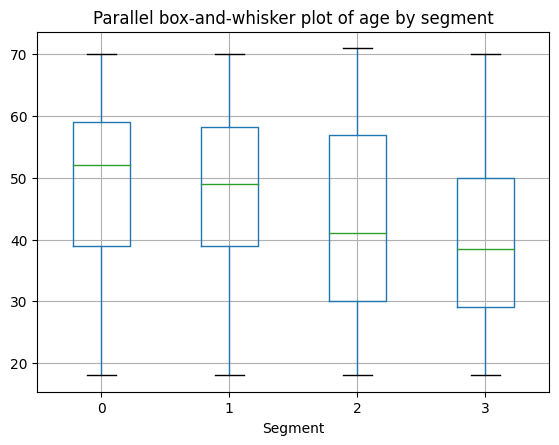

In [44]:
df = pd.DataFrame({'Segment': k4, 'Age': data['Age']})

df.boxplot(by='Segment', column='Age')
plt.title('Parallel box-and-whisker plot of age by segment')
plt.suptitle('')
plt.show()

In [48]:
data1['VisitFrequency'] = LabelEncoder().fit_transform(data1['VisitFrequency'])
visit = data1.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.787162
1,1,2.596195
2,2,2.618321
3,3,2.598553


from matplotlib import pyplot as plt
visit['cluster_num'].plot(kind='hist', bins=20, title='cluster_num')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
visit['VisitFrequency'].plot(kind='hist', bins=20, title='VisitFrequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
visit.plot(kind='scatter', x='cluster_num', y='VisitFrequency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['cluster_num']
  ys = series['VisitFrequency']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = visit.sort_values('cluster_num', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('cluster_num')
_ = plt.ylabel('VisitFrequency')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['cluster_num']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'cluster_num'}, axis=1)
              .sort_values('cluster_num', ascending=True))
  xs = counted['cluster_num']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = visit.sort_values('cluster_num', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('cluster_num')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
visit['cluster_num'].plot(kind='line', figsize=(8, 4), title='cluster_num')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
visit['VisitFrequency'].plot(kind='line', figsize=(8, 4), title='VisitFrequency')
plt.gca().spines[['top', 'right']].set_visible(False)

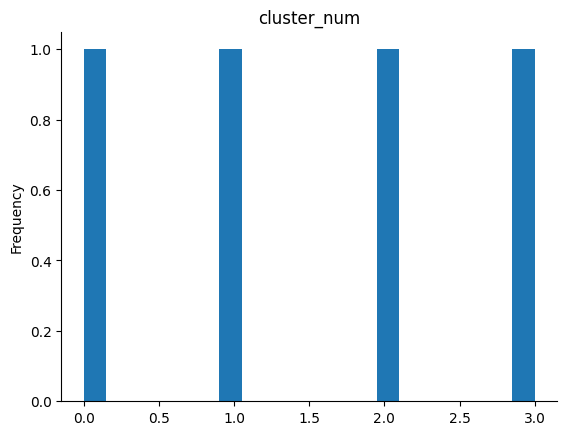

In [49]:
from matplotlib import pyplot as plt
visit['cluster_num'].plot(kind='hist', bins=20, title='cluster_num')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [51]:
data1['Like'] = LabelEncoder().fit_transform(data1['Like'])
Like = data1.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,5.888514
1,1,4.957717
2,2,3.694656
3,3,3.915009


from matplotlib import pyplot as plt
_df_2['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['cluster_num'].plot(kind='hist', bins=20, title='cluster_num')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Like'].plot(kind='hist', bins=20, title='Like')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='index', y='cluster_num', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='cluster_num', y='Like', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Like']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Like')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['cluster_num']
  ys = series['Like']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('cluster_num', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('cluster_num')
_ = plt.ylabel('Like')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['cluster_num']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'cluster_num'}, axis=1)
              .sort_values('cluster_num', ascending=True))
  xs = counted['cluster_num']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('cluster_num', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('cluster_num')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_11['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['cluster_num'].plot(kind='line', figsize=(8, 4), title='cluster_num')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Like'].plot(kind='line', figsize=(8, 4), title='Like')
plt.gca().spines[['top', 'right']].set_visible(False)

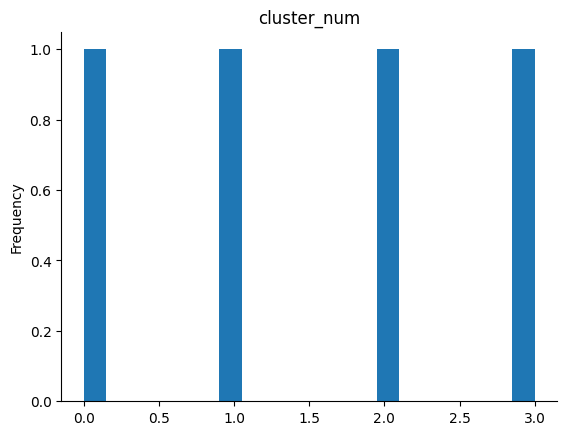

In [52]:
from matplotlib import pyplot as plt
_df_3['cluster_num'].plot(kind='hist', bins=20, title='cluster_num')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [53]:
data1['Gender'] = LabelEncoder().fit_transform(data1['Gender'])
Gender = data1.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.432432
1,1,0.547569
2,2,0.427481
3,3,0.401447


from matplotlib import pyplot as plt
Gender['cluster_num'].plot(kind='hist', bins=20, title='cluster_num')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
Gender['Gender'].plot(kind='hist', bins=20, title='Gender')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
Gender.plot(kind='scatter', x='cluster_num', y='Gender', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['cluster_num']
  ys = series['Gender']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = Gender.sort_values('cluster_num', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('cluster_num')
_ = plt.ylabel('Gender')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['cluster_num']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'cluster_num'}, axis=1)
              .sort_values('cluster_num', ascending=True))
  xs = counted['cluster_num']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = Gender.sort_values('cluster_num', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('cluster_num')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
Gender['cluster_num'].plot(kind='line', figsize=(8, 4), title='cluster_num')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
Gender['Gender'].plot(kind='line', figsize=(8, 4), title='Gender')
plt.gca().spines[['top', 'right']].set_visible(False)

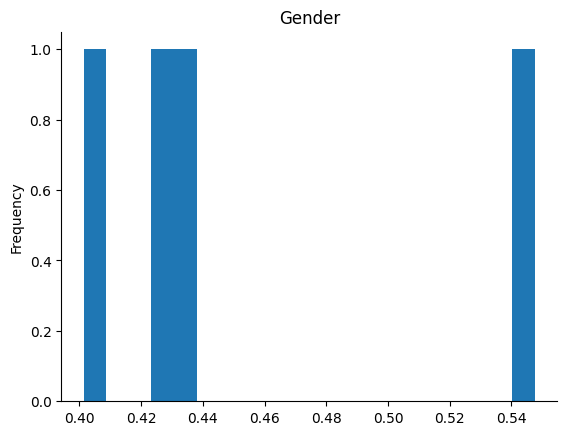

In [54]:
from matplotlib import pyplot as plt
Gender['Gender'].plot(kind='hist', bins=20, title='Gender')
plt.gca().spines[['top', 'right',]].set_visible(False)

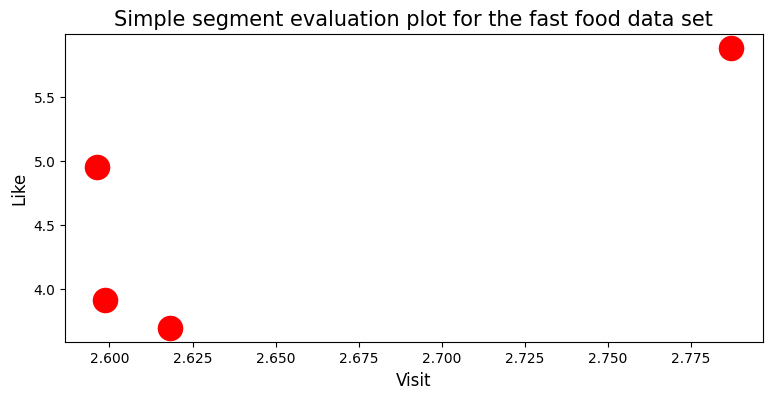

In [55]:
import seaborn as sns
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set",fontsize = 15)
plt.xlabel("Visit", fontsize = 12)
plt.ylabel("Like", fontsize = 12)
plt.show()